In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [58]:
training_file = '/home/anthony/git_repos/YOLOX-training/AH_training_outputs/train_Limg_lr0.00015625_wd0.0005/L_particulate_yolox_exp/train_log.txt'

In [92]:
def parse_traininglog(path, remove_max_dets = False):

    with open(path, 'r') as f:
        lines = f.readlines()
    
    trim_lines = []
    for l in lines:
        
        if 'Average Precision' not in l and 'Average Recall' not in l:
            continue
        
        l = l.strip('\n')
        l = l.lstrip()
        trim_lines.append(l)
    

    stats = {}

    for l in trim_lines:

        if 'maxDets=  1 ]' in l or 'maxDets= 10 ]' in l:
            continue

        if '(AP)' in l: 

            stat_name = l[: l.find(']') - 1]
            stat = l[l.rfind('=') + 1:]

        elif '(AR)' in l: 

            stat_name = l[: l.find(']') - 1]
            stat = l[l.rfind('=') + 1:]

        if stat_name not in stats:
            stats[stat_name] = []
        
        stats[stat_name].append(float(stat))

    df = pd.DataFrame(stats)

    # Convert the DataFrame from wide to long format
    df_long = df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

    #split dataframes based on recall andn precision
    df_recall = df_long[df_long['Metric'].str.contains('AR', na=False)]
    df_precision = df_long[df_long['Metric'].str.contains('AP', na=False)]

    return df_recall, df_precision

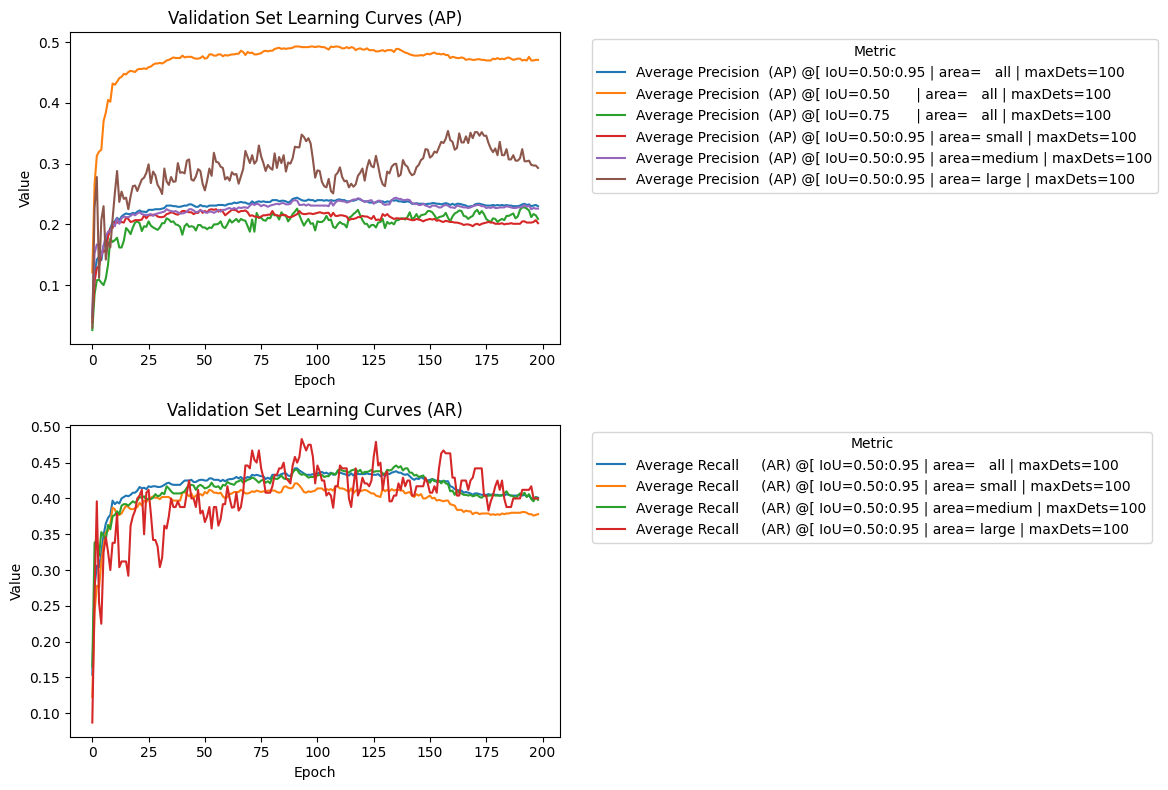

In [93]:
df_recall, df_precision = parse_traininglog(training_file, remove_max_dets = True)

# Plot using seaborn
plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
sns.lineplot(data=df_precision, x='index', y='Value', hue='Metric')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Validation Set Learning Curves (AP)')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional for better layout
plt.subplot(2,1,2)
sns.lineplot(data=df_recall, x='index', y='Value', hue='Metric')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Validation Set Learning Curves (AR)')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional for better layout
plt.tight_layout()
plt.show()